# Data Preparation

Dalam tahapan ini kita akan menyiapkan data dan melakukan pemilihan mana fitur yang ingin digunakan untuk pemrosesan data. Selain itu, hal yang terpenting adalah kita melakukan import library nya.


In [54]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [55]:
# membaca file csv
df = pd.read_csv("clustering.csv")

# melihat sebagian data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95,360.0,1.0,Urban,Y


In [56]:
# untuk melihat informasi pada setiap atribut
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    int64  
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 38.8+ KB


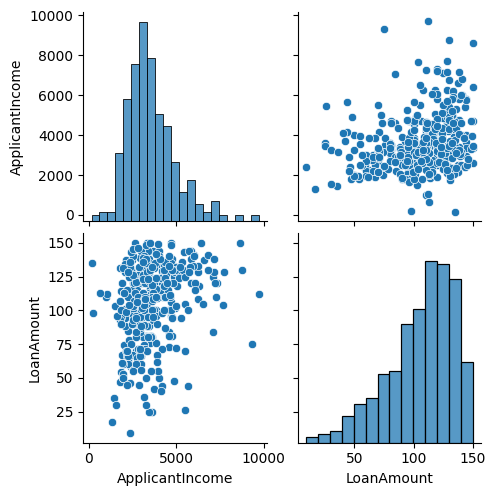

In [59]:
sns.pairplot(df)

In [61]:
# untuk menyimpan sebelum diubah dengan tujuan penampilan di bagian UI
original_df =  df.copy()

# menghilangkan kolom yang tidak perlu
df = df[["ApplicantIncome", "LoanAmount"]]

# Data Preprocessing

Pada tahapan ini data akan dilakukan cleaning dari data yang tidak bagus. Detailnya adalah pada data cleaning ini kita membuang data yang kosong, membuang data yang terduplikasi, dan data yang menyimpang atau paling beda sendiri. Lalu pada proses ini juga kita akan melakukan pengubahan data menjadi normalisasi tujuannya adalah untuk memberikan kontribusi yang seimbang antar variabel dikarenakan mempunyai scaling yang sama.

In [63]:
# pengecekan missing value
df.isna().sum()

ApplicantIncome    0
LoanAmount         0
dtype: int64

In [64]:
# pengecekan missing value
df.isnull().sum()

ApplicantIncome    0
LoanAmount         0
dtype: int64

ketika kita lihat dari pengecekan di atas bahwa tidak ada data yang kosong

{'whiskers': [<matplotlib.lines.Line2D at 0x2e7b626fbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x2e7b627f160>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e7b626f940>],
 'medians': [<matplotlib.lines.Line2D at 0x2e7b627f6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e7b627f940>],
 'means': []}

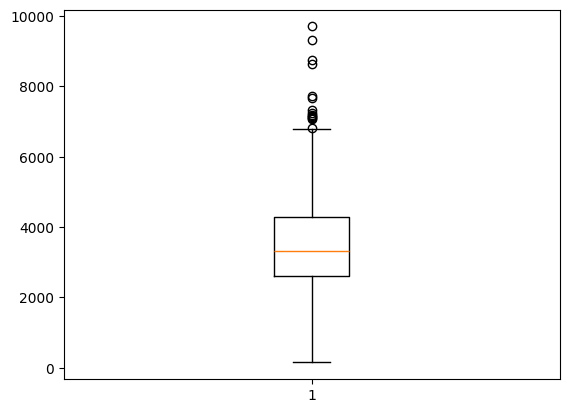

In [65]:
# pengecekan outlier / data yang aneh
plt.boxplot(df['ApplicantIncome'])

In [66]:
# menghitung jumlah outlier pada kolom applicantIncome
df[df['ApplicantIncome'] > 6000].count()

ApplicantIncome    24
LoanAmount         24
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2e7b6418910>,
 'caps': [<matplotlib.lines.Line2D at 0x2e7b6418d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e7b6418670>],
 'medians': [<matplotlib.lines.Line2D at 0x2e7b62a72e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e7b62a7580>],
 'means': []}

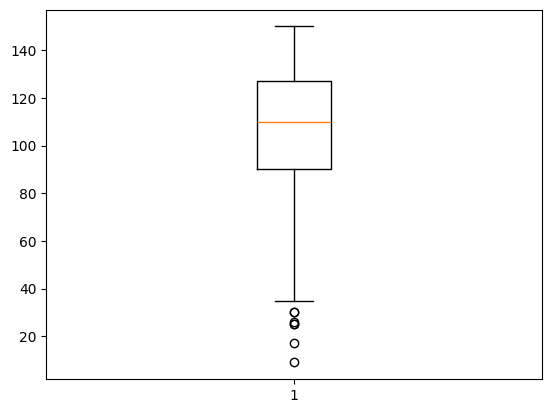

In [67]:
# melihat apakah ada outlier pada loanamount
plt.boxplot(df['LoanAmount'])

In [68]:
# menghitung jumlah outlier pada loanamount
df[df['LoanAmount'] < 40].count()

ApplicantIncome    9
LoanAmount         9
dtype: int64

ketika kita lihat dari data di atas terdapat outlier maka outlier ini perlu dihilangkan karena outlier akan menggangu proses training model. Outlier terlihat seperti titik titik di atas atau dibawah.

In [70]:
# untuk digunakan visualisasi sebelum dihilangkan outlier nya
data_outlier = df.copy()

# menghilangkan outlier yang ada
df = df[~((df['LoanAmount'] < 40) | ((df['ApplicantIncome'] > 6000) | (df['ApplicantIncome'] < 1000)))]

{'whiskers': [<matplotlib.lines.Line2D at 0x2e7b6309040>,
 'caps': [<matplotlib.lines.Line2D at 0x2e7b6309580>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e7b62f8d60>],
 'medians': [<matplotlib.lines.Line2D at 0x2e7b6309ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e7b6309d60>],
 'means': []}

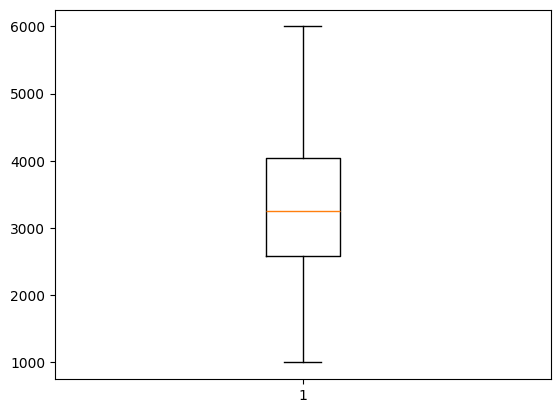

In [71]:
plt.boxplot(df['ApplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2e7b636d8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2e7b636ddf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e7b636d730>],
 'medians': [<matplotlib.lines.Line2D at 0x2e7b637d370>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e7b637d610>],
 'means': []}

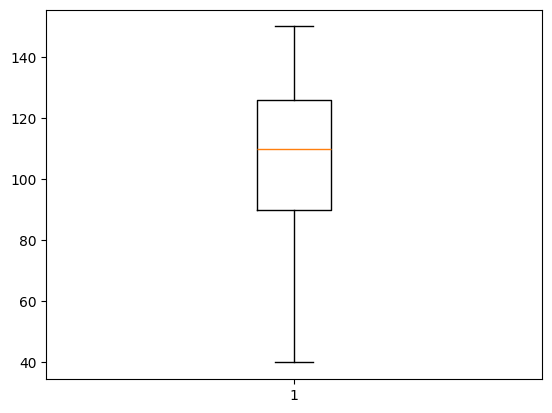

In [72]:
plt.boxplot(df['LoanAmount'])

In [74]:
# pengecekan duplikasi data
Df[df.duplicated()]

,ApplicantIncome,LoanAmount
246,2583,120
300,4333,110


Dikarenakan data diatas menurut saya bukan termasuk dalam data duplikat maka saya mengabaikan saja

Lalu kita akan masuk proses normalisasi dengan tujuan menyamakan scala pada setiap variable untuk scalanya yakni mulai dari 0-1

In [75]:
# menyiapkan copy agar dapat memvisualisasikannya
Non_normalize = df.copy()

# kita akan mengubah scalanya dari nilai yang kecil itu 0 dan yang paling besar adalah 1
for col in df.columns:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

In [76]:
# mencoba melihat dari datanya
df.head()

,ApplicantIncome,LoanAmount
0,0.7166,0.800000
1,0.4000,0.236364
2,0.3166,0.727273
3,1.0000,0.918182
4,0.2666,0.500000


# Training Model
dalam hal ini kita akan melakukan proses pembelajaran pada mesin untuk memisahkan data menjadi beberapa group yang memiliki karakteristiknya masing masing

In [101]:
# membuat class kmeans agar lebih fleksible dan mudah disimpan dan dirubahnya
class Kmeans():
    # mensetting parameter dan menyiapkan tipe data
    def __init__(self, n_cluster=2, max_iteration=100):
        self.n_cluster = n_cluster # banyaknya k
        self.max_iteration = max_iteration  # maximal iterasi
        self.centroid = None # pusat cluster
        self.label = None # labelnya
        self.all_ncentroid = [] # semua centroid
        self.all_nlabel = [] # semua cluster
        self.inertia = 0 # inertia
        self.iteration_ = 0 # sampai iterasi ke-

    # dalam fungsi ini mesin akan melakukan learning atau pembelajaran
    def fit(self, x):
        # melakukan random untuk menentukan centrod di awal
        self.centroid = np.random.uniform(np.amin(x, axis=0), np.amax(x, axis=0), size=(self.n_cluster, x.shape[1]))
        self.all_ncentroid.append(self.centroid) # menyimpannya di all centroid

        # melakukan iterasi / training
        for iteration in range(self.max_iteration):
            # untuk mereset nilai jarak cluster ke item dan reset label setiap item
            self.label = []
            distances_cluster = [] 

            # iterasi untuk menghitung distance
            for item in x:
                # menghitung jarak setiap item ke cluster
                distance = np.sqrt(np.sum((item - self.centroid)**2, axis=1))
                distances_cluster.append(distance.min()) # menyimpan jarak terdekat
                cluster = np.argmin(distance) # menentukan dia cluster yang mana
                self.label.append(cluster)

            # membuat array yang memisahkan group / cluster
            groups = []
            self.label = np.array(self.label)
            self.all_nlabel.append(self.label)

            # iterasi untuk misahkan item sesuai groupnya
            for i in range(self.n_cluster):
                groups.append(np.argwhere(i == self.label)) # jika terdeteksi pada group yang sama

            # menyiapkan data centroid yang baru dan jarak terkecil yang dihitung
            new_centroid = []
            sum_distance = []

            # untuk menentukan centroid baru
            for i, indices in enumerate(groups):
                # jika tidak mempunyai member maka jangan pindahkan cluster
                if len(indices) == 0:
                    new_centroid.append(self.centroid[i])
                else:
                    # mencari rata2 pada setiap cluster untuk menentukan centroid baru
                    new_centroid.append(np.mean(x[indices], axis=0)[0]) 
                    sum_distance.append(np.sum(distances_cluster)**2) # menghitung square error

            # menghitung rata2 error
            self.inertia = np.mean(sum_distance)

            # mengumpulkan semua centroid
            self.all_ncentroid.append(new_centroid)
            
            # jika tidak terdapat perubahan pada semua centroid berhentikan training
            if np.max(np.abs(self.centroid - np.array(new_centroid))) < 0.00001:
                self.iteration_ = iteration # berhenti paselfda iterasi ke-
                break
            # jika tidak update centroidnya
            else:
                self.centroid = np.array(new_centroid) # perbarui centroid 

    def predict(self, x):
        x = np.array(x)
        distance = np.sqrt(np.sum((x - self.centroid)**2, axis=1)) # menghitung jarak setiap centroid dg item
        cluster = np.argmin(distance) # menentukan dia cluster yang mana
        return cluster
                    



In [102]:
# untuk memisahkan data test dan data train
def Train_test_split(x, random_seed=None, test_size=70):
    # bisa dilakukan random dengan seed
    if random_seed:
        np.random.seed(random_seed)
    indices = np.random.permutation(x.shape[0]) # membuat numpy yang random
    train_indices, test_indices = indices[:test_size], indices[test_size:] # membagi menjadi train dan test
    return x.iloc[train_indices], x.iloc[test_indices] 

In [103]:
# membagi data train dan data test
data_train, data_test = Train_test_split(df, random_seed=42, test_size=70)
data_train

,ApplicantIncome,LoanAmount
213,0.9006,0.272727
176,0.2602,0.345455
248,0.4200,0.663636
227,0.4026,0.500000
352,0.5350,0.618182
...,...,...
191,0.8000,0.836364
79,0.2274,0.881818
82,0.2028,0.309091
18,0.6452,0.636364


lalu untuk mengetahui jumlah k yang tepat kita bisa menggunakan elbow method

In [128]:
# menyiapkan untuk menyimpan hasil seluruh wcss 
wcss = []

# melakukan iterasi dan mencoba nilai k 1-10
for k in range(1, 11):
    kmean = Kmeans(n_cluster=k) # inisialisasi
    kmean.fit(df.to_numpy()) # melakukan training
    wcss.append(kmean.inertia)

Text(0, 0.5, 'wcss')

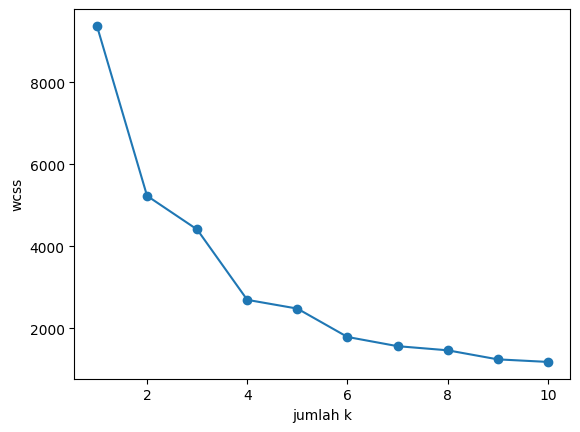

In [129]:
# menampilkan grafik linespace yang membentuk elbow 
plt.plot(np.arange(1, 11), wcss, marker="o") 
plt.xlabel("jumlah k")
plt.ylabel("wcss")

Ketika kita melihat dari grafik elbow di atas, kita dapat melihat bahwa dimana sikunya yang dapat dipilih sebagai jumlah k yakni pada k = 4

In [130]:
# kita dapat memilih nilai k yang paling cocok
model = Kmeans(n_cluster=4)
model.fit(df.to_numpy())
model.label.shape

(345,)

lalu setelah itu kita akan melihat dari hasil scatternya

Text(0, 0.5, 'LoanAmount')

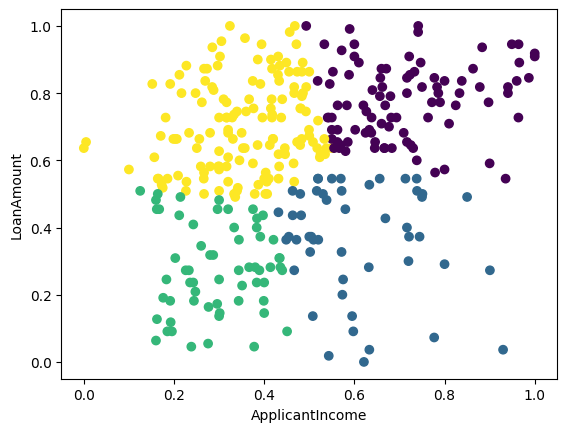

In [131]:
# menampilkan grafik scatter
plt.scatter(df["ApplicantIncome"], df["LoanAmount"], c=model.label)
plt.xlabel("ApplicantIncome")
plt.ylabel("LoanAmount")

In [132]:
# melihat dari pusat kluster
model.centroid

array([[0.71042826, 0.77588933],
       [0.605052  , 0.36618182],
       [0.29554426, 0.27913562],
       [0.35468169, 0.7024968 ]])

ketika melihat data yang di atas dapat disimpulkan bahwa setiap cluster memiliki karakteristiknya masing masing dan memiliki karakteristik yang tegas. Berikut ringkasan dari analisis karakteristik setiap cluster berdasarkan rata2 atribut:
- cluster 1: untuk grup ini rata-ratanya memiliki income yang tinggi tetapi memiliki hutang yang tinggi juga
- cluster 2: untuk grup ini rata-ratanya memiliki income yang sedang tetapi memiliki hutang yang rendah
- cluster 3: untuk grup ini rata-ratanya memiliki income yang rendah dan hutang yang rendah juga
- cluster 4: untuk grup ini rata-ratanya memiliki income yang rendah dan hutang yang tinggi

Lalu kita dapat mengetest prediksi kita

# testing model

In [133]:
# untuk menampung semua prediksi
predict = []

# mencoba satu per satu untuk data test nya
for i in range(data_test.shape[0]):
    predict.append(model.predict(data_test.iloc[i].to_list()))

# melihat hasil prediksinya
predict

[0,
 3,
 2,
 3,
 2,
 3,
 0,
 0,
 1,
 3,
 0,
 2,
 3,
 3,
 3,
 1,
 0,
 1,
 1,
 3,
 3,
 0,
 0,
 3,
 3,
 2,
 1,
 0,
 0,
 1,
 3,
 2,
 2,
 1,
 0,
 3,
 1,
 3,
 2,
 0,
 3,
 1,
 3,
 2,
 3,
 3,
 2,
 0,
 2,
 1,
 0,
 3,
 1,
 3,
 1,
 1,
 2,
 3,
 0,
 3,
 0,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 1,
 3,
 0,
 0,
 3,
 0,
 0,
 0,
 2,
 3,
 0,
 2,
 0,
 2,
 2,
 1,
 3,
 3,
 3,
 2,
 0,
 3,
 0,
 3,
 3,
 3,
 2,
 3,
 2,
 0,
 2,
 3,
 3,
 2,
 3,
 1,
 3,
 0,
 3,
 2,
 2,
 3,
 3,
 1,
 3,
 2,
 3,
 0,
 2,
 3,
 2,
 2,
 1,
 3,
 3,
 0,
 2,
 0,
 3,
 3,
 1,
 0,
 0,
 0,
 3,
 3,
 0,
 0,
 1,
 3,
 3,
 1,
 2,
 3,
 0,
 3,
 0,
 3,
 1,
 0,
 3,
 1,
 1,
 3,
 3,
 3,
 1,
 0,
 2,
 0,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 1,
 0,
 2,
 3,
 0,
 0,
 2,
 3,
 3,
 3,
 3,
 3,
 0,
 0,
 3,
 3,
 2,
 0,
 3,
 3,
 2,
 0,
 0,
 3,
 2,
 1,
 0,
 0,
 3,
 3,
 0,
 3,
 3,
 3,
 0,
 2,
 3,
 0,
 3,
 3,
 3,
 2,
 0,
 2,
 0,
 0,
 3,
 3,
 2,
 3,
 1,
 0,
 2,
 1,
 1,
 3,
 3,
 1,
 3,
 3,
 0,
 3,
 3,
 3,
 2,
 0,
 2,
 0,
 3,
 3,
 0,
 1,
 0,
 0,
 0,
 1,
 3,
 3,
 3,
 1,
